# Stiffness matrix and equivalent force vector of Euler Bernoulli beam

In [1]:
import sympy as sym
sym.init_printing()

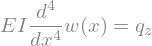

In [2]:
EI, q_z, x, L = sym.symbols('EI, q_z, x, L')
w = sym.Function('w')

ODE_bending = sym.Eq(w(x).diff(x, 4) *EI, q_z)
display(ODE_bending)

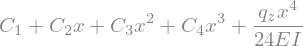

In [3]:
w = sym.dsolve(ODE_bending, w(x)).rhs
display(w)

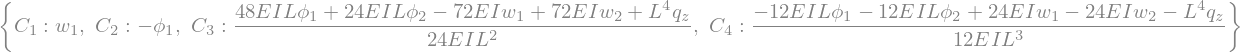

In [4]:
w_1, w_2, phi_1, phi_2 = sym.symbols('w_1, w_2, phi_1, phi_2')
phi = -w.diff(x)
eq1 = sym.Eq(w.subs(x,0),w_1)
eq2 = sym.Eq(w.subs(x,L),w_2)
eq3 = sym.Eq(phi.subs(x,0),phi_1)
eq4 = sym.Eq(phi.subs(x,L),phi_2)
C_sol = sym.solve([eq1, eq2, eq3, eq4 ], sym.symbols('C1, C2, C3, C4'))
display(C_sol)

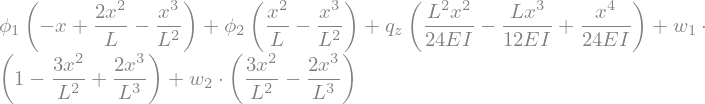

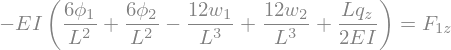

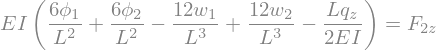

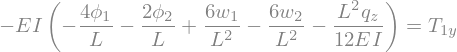

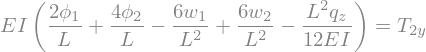

In [5]:
w = sym.collect(w.subs(C_sol).expand(),[w_1,w_2,phi_1,phi_2, q_z])
display(w)
phi = -w.diff(x)
kappa = phi.diff(x).subs(C_sol)
M = EI * kappa
V = M.diff(x)
F_1_z, F_2_z, T_1_y, T_2_y = sym.symbols('F_1_z, F_2_z, T_1_y, T_2_y')

eq5 = sym.Eq(-V.subs(x,0), F_1_z)
eq6 = sym.Eq(V.subs(x,L), F_2_z)
eq7 = sym.Eq(-M.subs(x,0), T_1_y)
eq8 = sym.Eq(M.subs(x,L), T_2_y)
display(eq5, eq6, eq7, eq8)

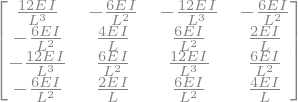

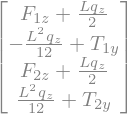

In [6]:
A, b = sym.linear_eq_to_matrix([eq5,eq7, eq6, eq8], [w_1, phi_1, w_2, phi_2])
display(A,b)